In [1]:
%matplotlib inline


# Plot multinomial and One-vs-Rest Logistic Regression

Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.


Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
coef :  [[-4.51740321 -1.56048296]
 [-0.08918381  0.72635442]
 [ 4.60658703  0.83412854]]
new_coef :  [[-4.4282194  -2.28683738]
 [-4.69577084 -0.10777413]
 [ 9.12399024  2.39461151]]
intercept : [-1.69874938  2.89695153 -1.19820215]
new_intercept : [-4.59570091  4.09515368  0.50054723]
training score : 0.976 (ovr)
coef :  [[-4.41615534 -2.23077034]
 [-0.36796618  1.64022091]
 [ 4.7027708   0.18133443]]
new_coef :  [[-4.04818916 -3.87099126]
 [-5.07073697  1.45888648]
 [ 9.11892613  2.41210477]]
intercept : [-4.61020975 -1.91396323 -4.17213317]
new_intercept : [-2.69624652  2.25816994  0.43807658]


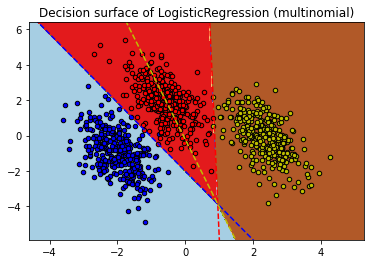

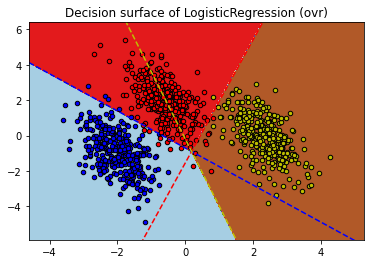

In [11]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_
    new_coef = np.zeros_like(coef)
    new_intercept = np.zeros_like(intercept)
    for i in range(len(coef)):
        j = 0 if i == len(coef)-1 else i+1
        new_coef[i] = coef[i] - coef[j]
        new_intercept[i] = intercept[i] - intercept[j]

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * new_coef[c, 0]) - new_intercept[c]) / new_coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()